In [ ]:
# "https://drive.google.com/file/d/1zfHPtllRA9_GZUzHSw3eN45bvZHe4-Qa/view?usp=drive_link"
# https://www.jsums.edu/nmeghanathan/files/2015/08/CSC641-Fall2015-Module-4-Random-Graph-Theory.pdf

In [ ]:
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 8 not upgraded.
Need to get 2,433 kB of archives.
After this operation, 7,694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2 [2,037 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy

In [ ]:
import networkx as nx
from itertools import product
from random import random
import matplotlib.pyplot as plt
import math
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

## Q1

0.788 0.01200000000000001


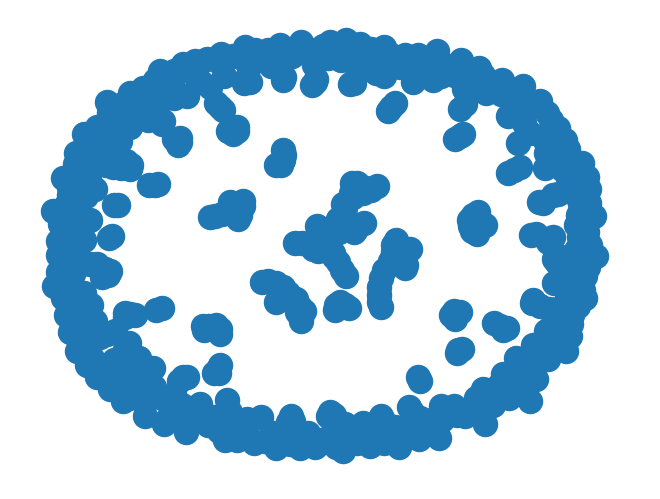

In [ ]:
n = 500
k = 0.8
G1 = nx.erdos_renyi_graph(n, k / (n - 1))
nx.draw(G1)
K = sum(dict(G1.degree()).values())/float(n)
print(K, abs(K-k))

0.788 0.21199999999999997


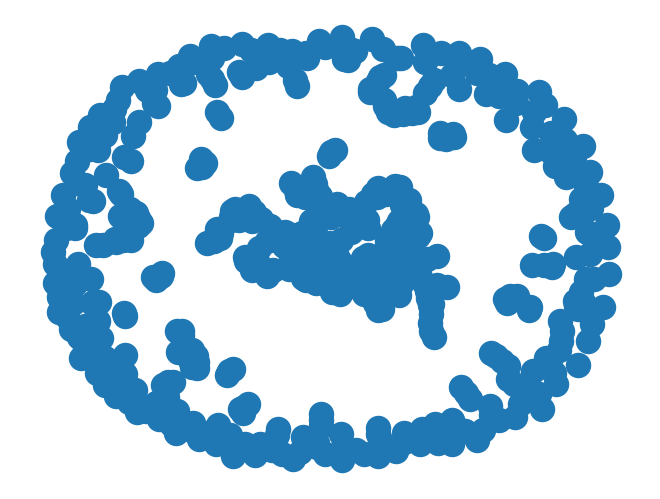

In [ ]:
n = 500
k = 1
G2 = nx.erdos_renyi_graph(n, k / (n - 1))
nx.draw(G2)
K = sum(dict(G1.degree()).values())/float(n)
print(K, abs(K-k))

7.812


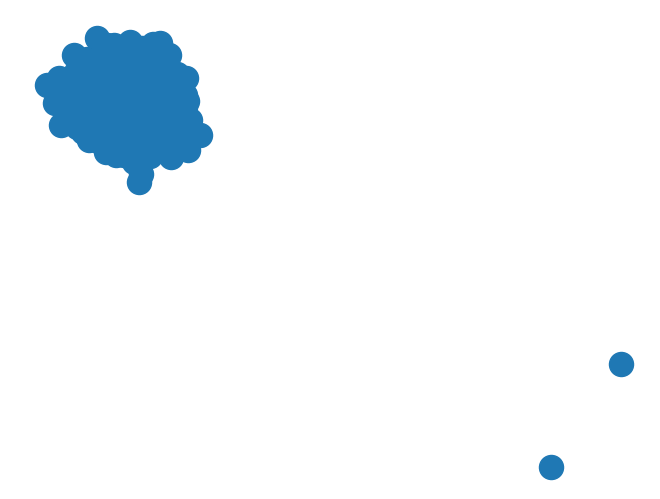

In [ ]:
n = 500
k = 8
G3 = nx.erdos_renyi_graph(n, k / (n - 1))
nx.draw(G3)
print(sum(dict(G3.degree()).values())/float(n))

## Q2

N =  10
P =  0.1
Q =  0.1
Blue-graph average degree :  0.8
Combined-graph average degree :  2.3


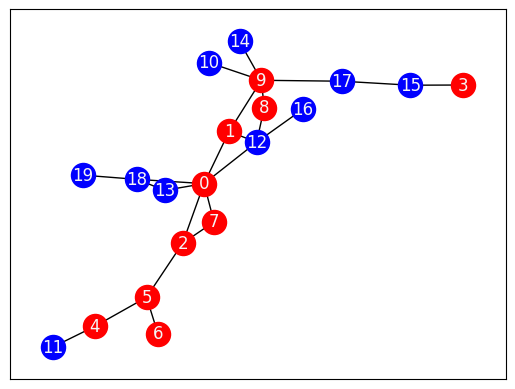

In [ ]:
# Parameters
N  = 10
p = 0.1
q  = 0.1
print("N = ", N)
print("P = ", p)
print('Q = ', q)

red_graph = nx.fast_gnp_random_graph(N, p)
blue_graph = nx.fast_gnp_random_graph(N, p)
print("Blue-graph average degree : ", sum(dict(blue_graph.degree()).values())/float(N))

combined = nx.Graph()
red      = red_graph.nodes()
blue     = [ N + node for node in blue_graph.nodes() ]
combined.add_nodes_from(red)
combined.add_edges_from(red_graph.edges())
combined.add_nodes_from(blue)
combined.add_edges_from([ (N + u, N + v) for u, v in blue_graph.edges() ])
combined.add_edges_from([ (u, v) for u, v in product(red, blue) if random() < q ])
print("Combined-graph average degree : ", sum(dict(combined.degree()).values())/float(2*N))

pos = nx.spring_layout(combined)
nx.draw_networkx_nodes(combined, pos=pos, nodelist=red, node_color='r')
nx.draw_networkx_nodes(combined, pos=pos, nodelist=blue, node_color='b')
nx.draw_networkx_edges(combined, pos=pos)
nx.draw_networkx_labels(combined, pos=pos, font_color="whitesmoke")
plt.show()

In [ ]:
combined.order()

20

## Q3

N =  20
P =  0.5
Q =  0.2
F =  0.3
Combined-graph average degree :  8.3


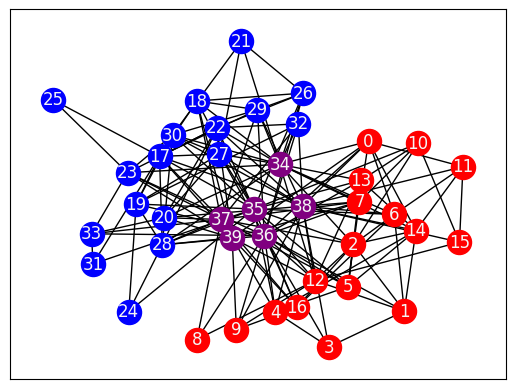

In [ ]:
N = 20
f_2 = 0.15
p = 0.5
q = 0.2
print('N = ', N)
print('P = ', p)
print('Q = ', q)
print('F = ', f_2 * 2)
M = int(N * (1 - f_2))
K = N - M

combined = nx.Graph()
red_graph = nx.fast_gnp_random_graph(M, q)
blue_graph = nx.fast_gnp_random_graph(M, q)
purple_graph = nx.fast_gnp_random_graph(K * 2, 0)

red      = red_graph.nodes()
blue     = [ M + node for node in blue_graph.nodes() ]
purple   = [ 2 * M + node for node in purple_graph.nodes() ]
combined.add_nodes_from(red)
combined.add_edges_from(red_graph.edges())
combined.add_nodes_from(blue)
combined.add_edges_from([ (M + u, M + v) for u, v in blue_graph.edges() ])
combined.add_edges_from([ (u, v) for u, v in product(purple, blue) if random() < p ])
combined.add_edges_from([ (u, v) for u, v in product(purple, red) if random() < p ])
print("Combined-graph average degree : ", sum(dict(combined.degree()).values())/float(2*N))

pos = graphviz_layout(combined, prog="neato", args="-Goverlap=prism -Goverlap_scaling=100")
nx.draw_networkx_nodes(combined, pos=pos, nodelist=red, node_color='red')
nx.draw_networkx_nodes(combined, pos=pos, nodelist=blue, node_color='blue')
nx.draw_networkx_nodes(combined, pos=pos, nodelist=purple, node_color='purple')
nx.draw_networkx_edges(combined, pos=pos)
nx.draw_networkx_labels(combined, pos=pos, font_color="whitesmoke")
plt.show()

In [ ]:
dist_mat = nx.floyd_warshall_numpy(combined)
count = 0
for x in red:
    for y in blue:
        if dist_mat[x][y] < 3:
            count += 1
print(len(red), len(blue), len(red) * len(blue), count, abs(len(red) * len(blue) - count) / (len(red) * len(blue)))

17 17 289 216 0.25259515570934254
